In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

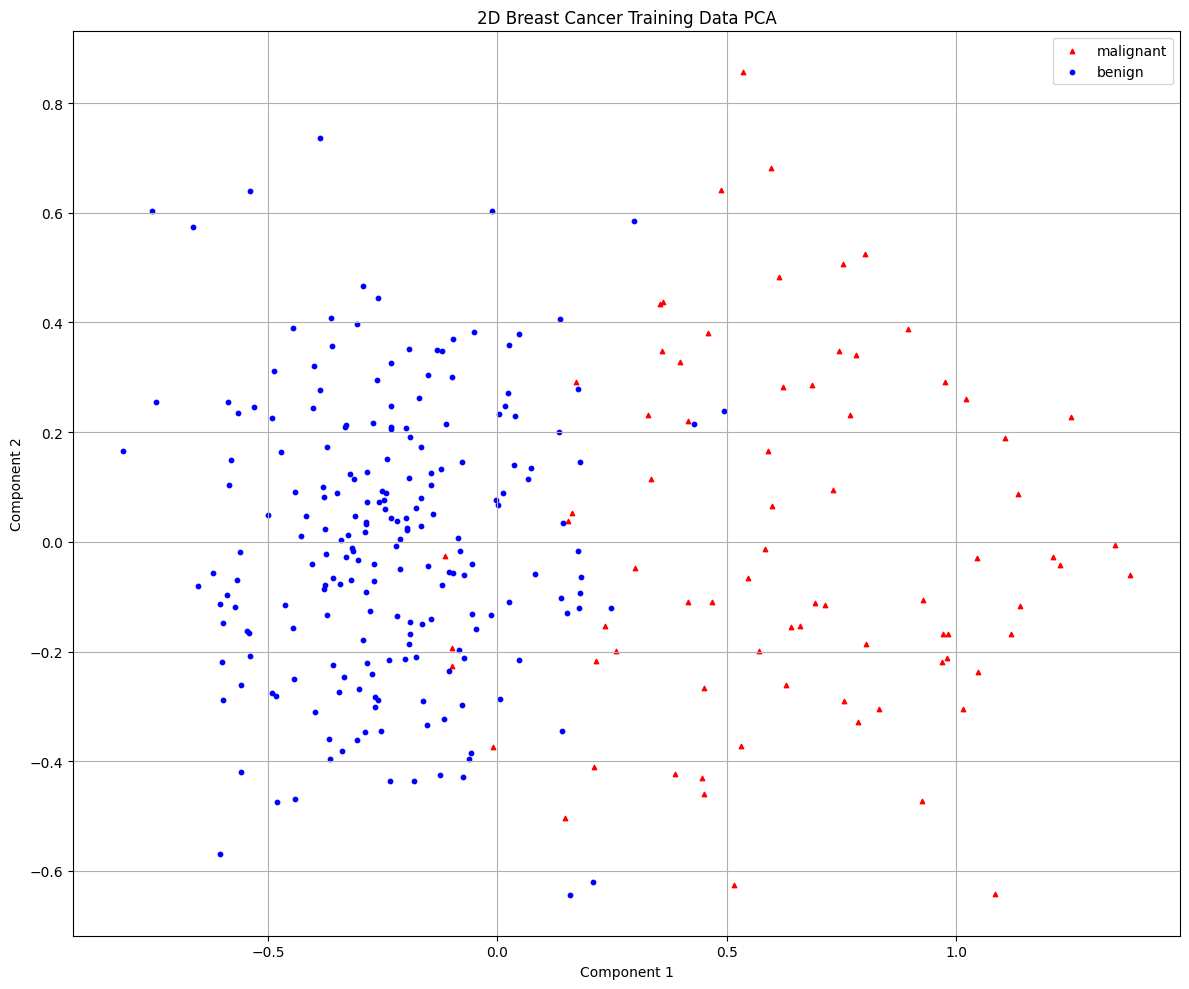

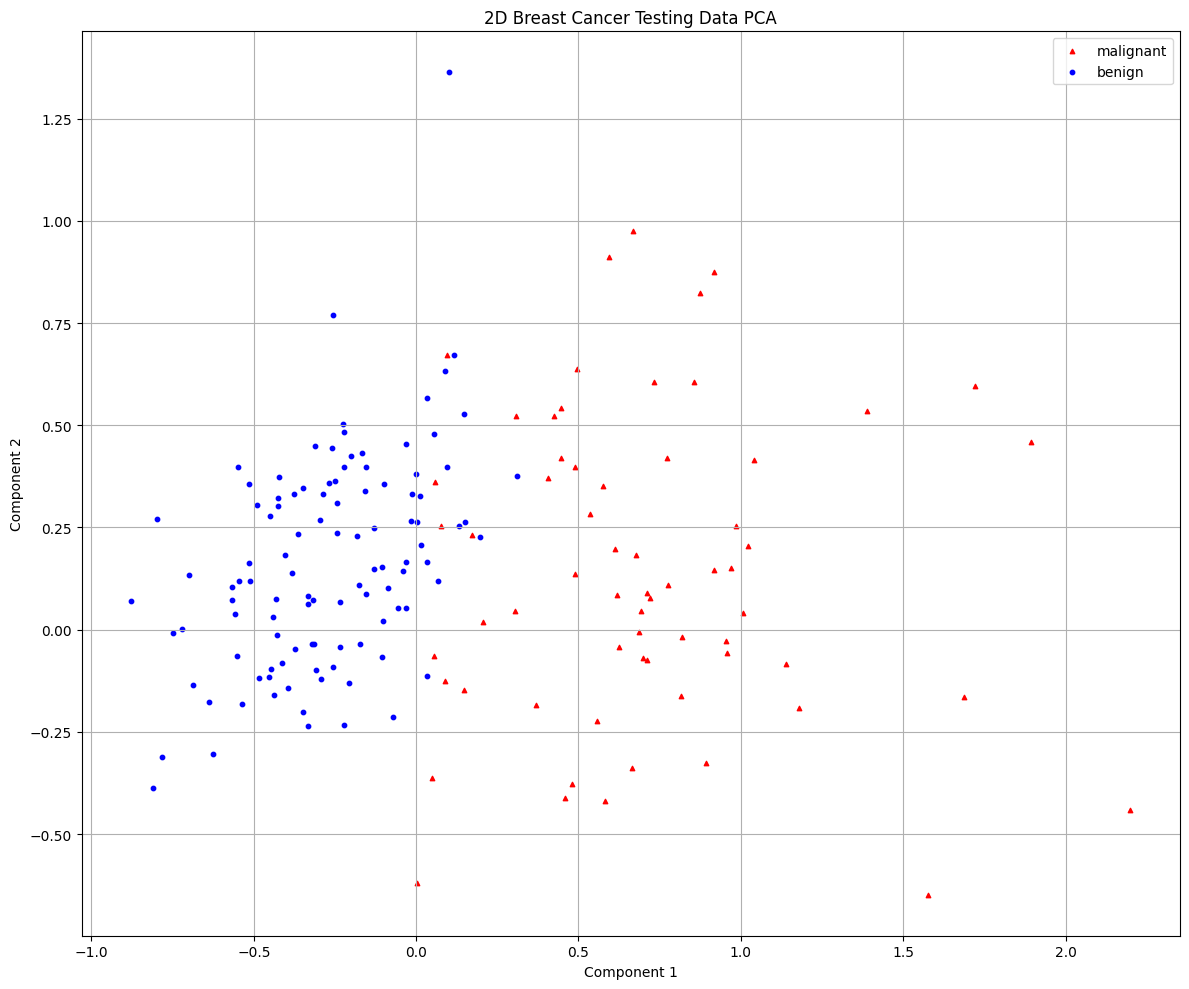

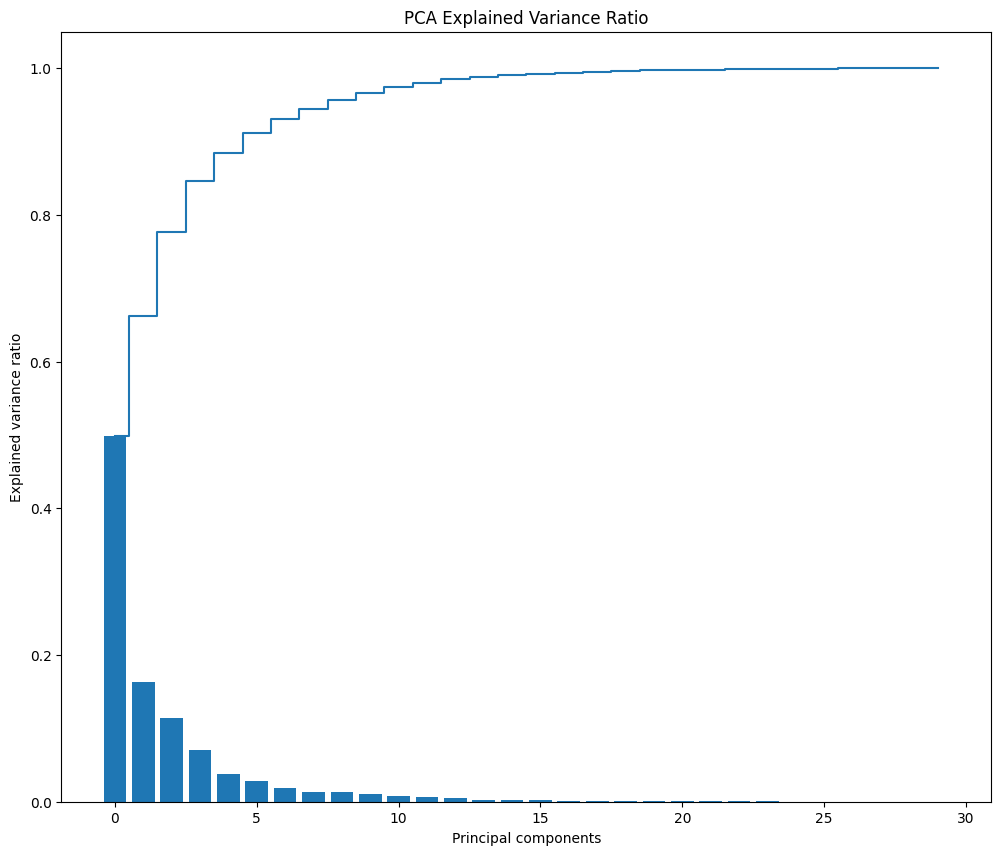

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

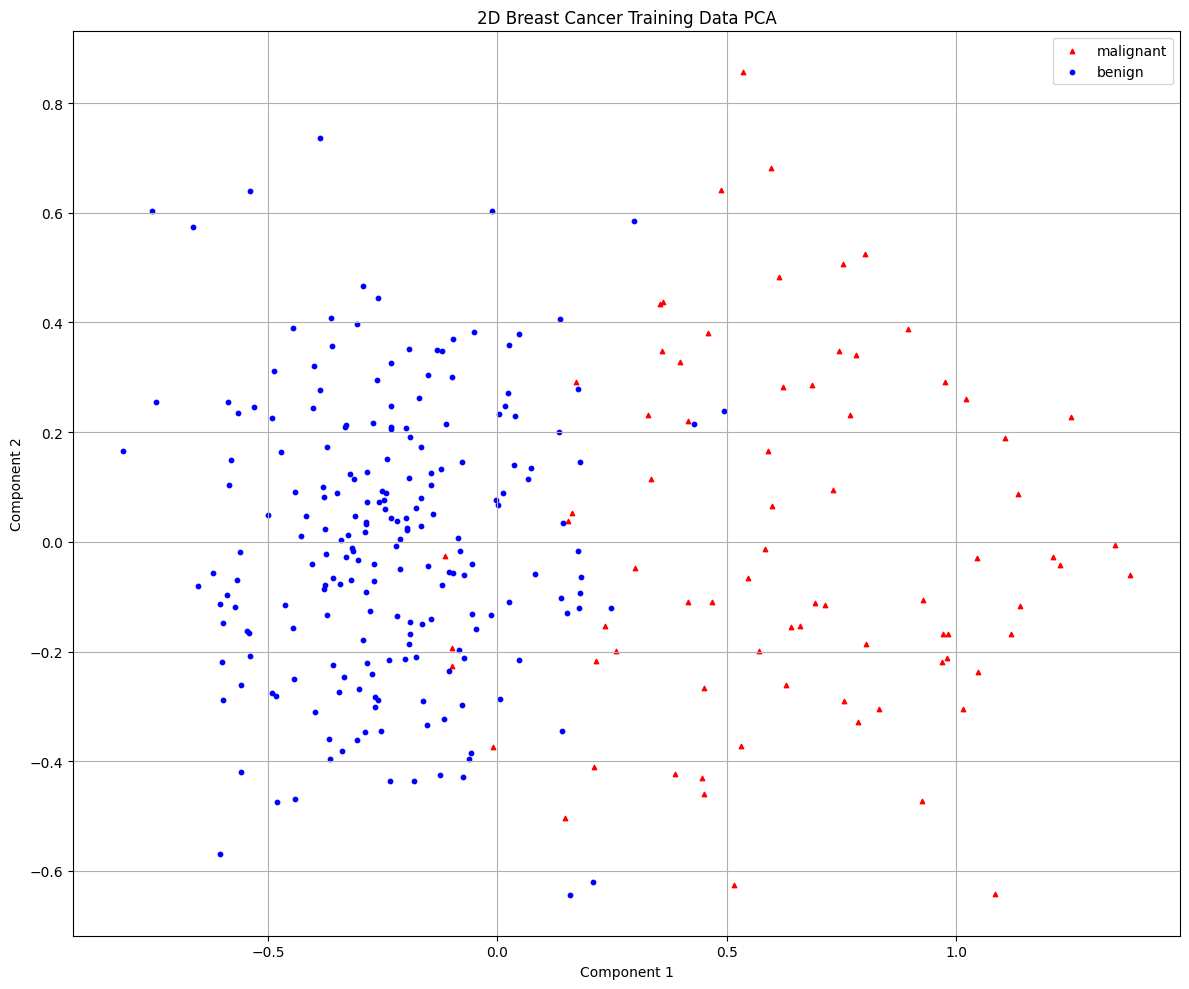

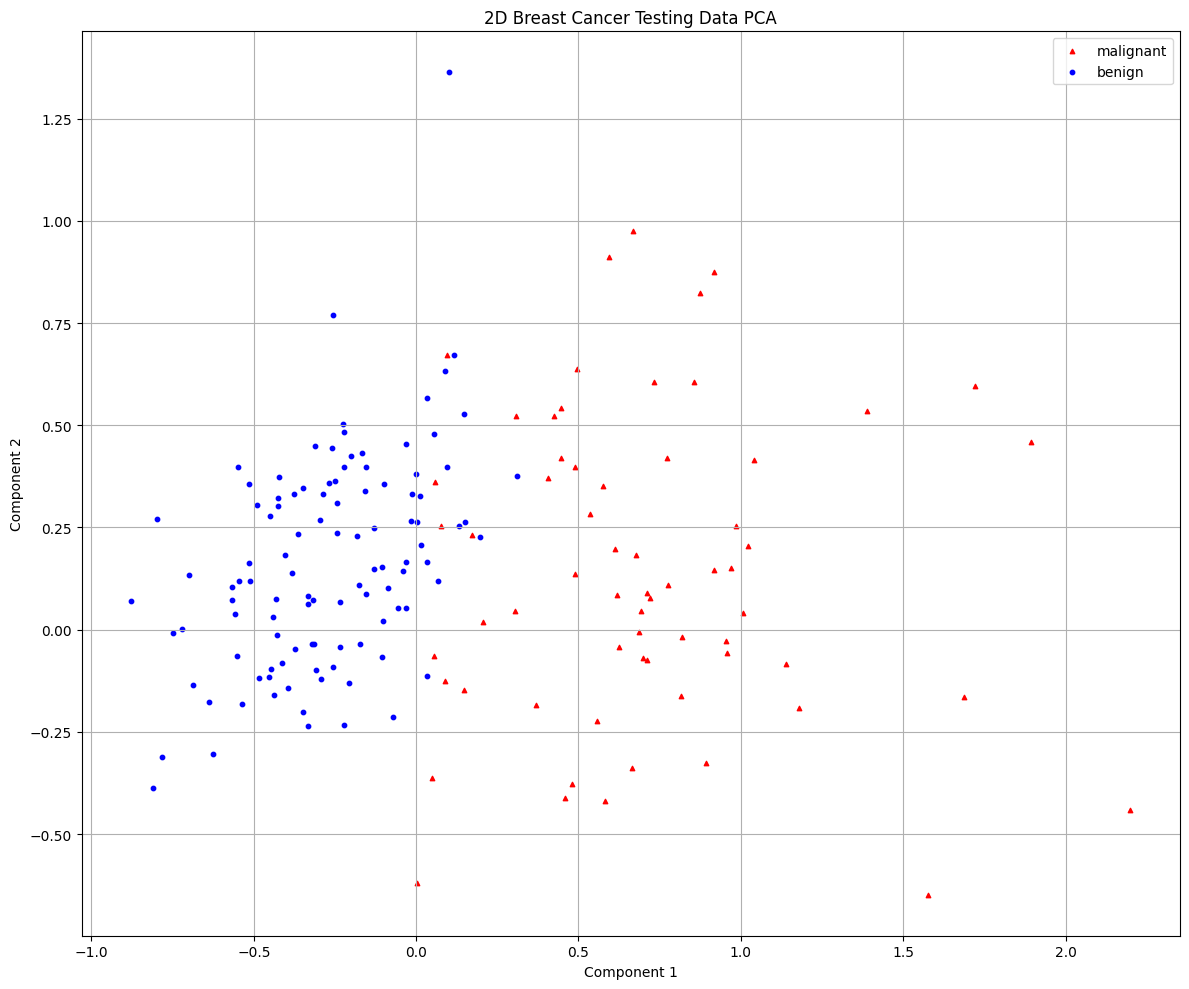

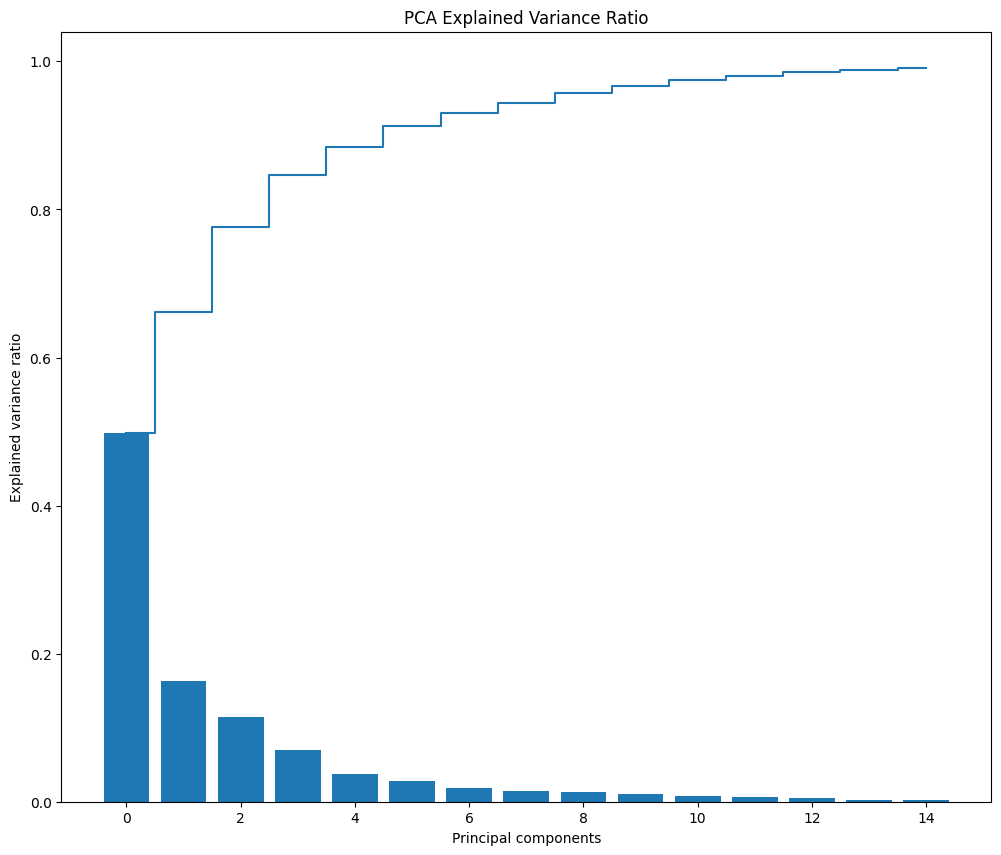

[I 2025-04-27 09:43:15,582] A new study created in memory with name: no-name-3e1d124e-7cd2-4666-9f95-8143f4396e02
[I 2025-04-27 09:43:15,815] Trial 0 finished with value: 0.9650937689050212 and parameters: {'penalty': 'l2', 'C': 84.62931175032804, 'solver': 'saga', 'max_iter': 9122}. Best is trial 0 with value: 0.9650937689050212.
[I 2025-04-27 09:43:20,864] Trial 1 finished with value: 0.9616454930429521 and parameters: {'penalty': 'l2', 'C': 77.20357187825903, 'solver': 'lbfgs', 'max_iter': 4999}. Best is trial 0 with value: 0.9650937689050212.
[I 2025-04-27 09:43:22,602] Trial 2 finished with value: 0.96854204476709 and parameters: {'penalty': 'l2', 'C': 66.59692477901704, 'solver': 'lbfgs', 'max_iter': 2465}. Best is trial 2 with value: 0.96854204476709.
[I 2025-04-27 09:43:22,696] Trial 3 finished with value: 0.9685420447670902 and parameters: {'penalty': 'l2', 'C': 52.42279617107732, 'solver': 'saga', 'max_iter': 1780}. Best is trial 3 with value: 0.9685420447670902.
[I 2025-04-2

Best trial:
Accuracy: 0.982456140350877
Best hyperparameters:  {'penalty': 'l2', 'C': 19.935076527317463, 'solver': 'saga', 'max_iter': 5614}


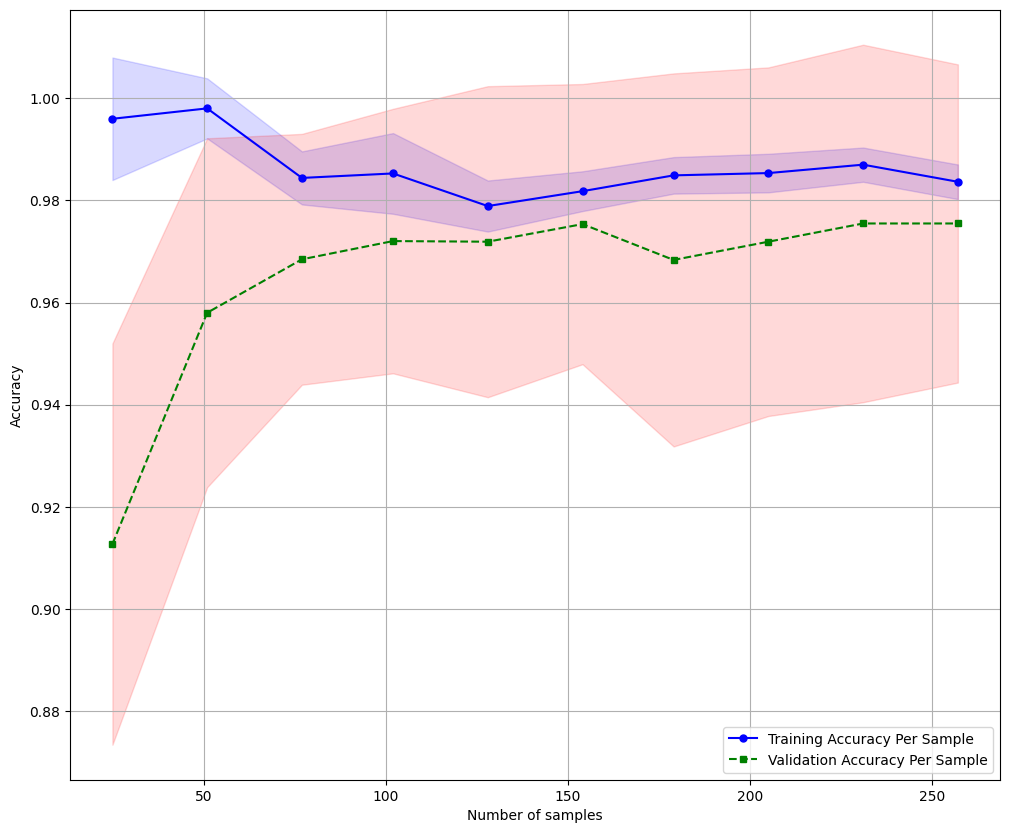

Confusion Matrix
[[ 55   9]
 [  0 107]]
Accuracy: 0.9474, Precision: 0.9224, Recall: 1.0000, F1: 0.9596, AUC: 0.9969


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('lr', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)